<a href="https://colab.research.google.com/github/vimalthomas-db/deeplearning/blob/main/MPG_Data_Loader_Simplified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
!pip install ucimlrepo
!pip install scikit-learn

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Combine features and target into one DataFrame for easy filtering
data = pd.concat([X, y], axis=1)

# Drop rows where the target variable is NaN
cleaned_data = data.dropna()

# Split the data back into features (X) and target (y)
X = cleaned_data.iloc[:, :-1]
y = cleaned_data.iloc[:, -1]

# Display the number of rows removed
rows_removed = len(data) - len(cleaned_data)
print(f"Rows removed: {rows_removed}")

Rows removed: 6


In [3]:
from sklearn.model_selection import train_test_split

# Do a 70/30 split (e.g., 70% train, 30% other)
X_train, X_leftover, y_train, y_leftover = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,    # for reproducibility
    shuffle=True,       # whether to shuffle the data before splitting
)

# Split the remaining 30% into validation/testing (15%/15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_leftover, y_leftover,
    test_size=0.5,
    random_state=42,
    shuffle=True,
)

# Compute statistics for X (features)
X_mean = X_train.mean(axis=0)  # Mean of each feature
X_std = X_train.std(axis=0)    # Standard deviation of each feature

# Standardize X
X_train = (X_train - X_mean) / X_std
X_val = (X_val - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Compute statistics for y (targets)
y_mean = y_train.mean()  # Mean of target
y_std = y_train.std()    # Standard deviation of target

# Standardize y
y_train = (y_train - y_mean) / y_std
y_val = (y_val - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

In [5]:

train_x, train_y = X_train.values, y_train.values
val_x, val_y =     X_val.values, y_val.values
test_x, test_y =   X_test.values, y_test.values

train_y = train_y.reshape(-1, 1)
val_y = val_y.reshape(-1, 1)
test_y = test_y.reshape(-1, 1)


print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)
print(test_x.shape, test_y.shape)

(274, 7) (274, 1)
(59, 7) (59, 1)
(59, 7) (59, 1)


In [23]:
# Clone the GitHub repository (if required)
!git clone https://github.com/vimalthomas/deeplearning.git
%cd deeplearning/
# Run the specific notebook/script
%run "Multilayerperceptron_drop.ipynb"

Cloning into 'deeplearning'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 144 (delta 5), reused 2 (delta 2), pack-reused 134 (from 1)
Receiving objects: 100% (144/144), 136.65 KiB | 732.00 KiB/s, done.
Resolving deltas: 100% (88/88), done.
/content/deeplearning/deeplearning/deeplearning/deeplearning/deeplearning


In [ ]:
import numpy as np

# Define the hyperparameter grids
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
epochs_list = [1000, 2000, 3000]

# Store results
results = []

# Iterate through hyperparameter combinations
for lr in learning_rates:
    for batch_size in batch_sizes:
        for epochs in epochs_list:
            # Initialize the MLP
            mlp = MultilayerPerceptron([
                Layer(train_x.shape[1], 256, Relu(), dropout_rate=0.00),
                Layer(256, 128, Relu(), dropout_rate=0.00),
                Layer(128, 64, Relu(), dropout_rate=0.00),
                Layer(64, 64, Relu(), dropout_rate=0.00),
                Layer(64, 1, Linear())
            ])

            loss_function = SquaredError()

            # Train the model
            train_losses, val_losses = mlp.train(
                train_x=train_x, train_y=train_y,
                val_x=val_x, val_y=val_y,
                loss_func=loss_function,
                learning_rate=lr, batch_size=batch_size, epochs=epochs, model_type='regression'
            )

            # Store the results
            results.append({
                'learning_rate': lr,
                'batch_size': batch_size,
                'epochs': epochs,
                'train_loss': train_losses[-1],  # Final training loss
                'val_loss': val_losses[-1]    # Final validation loss
            })

# Display the results
for result in results:
    print(result)

Streaming output truncated to the last 5000 lines.
Epoch 1444/3000 - Training MSE: 0.0875 - Validation MSE: 0.0979 - Training MAE: 0.2147 - Validation MAE: 0.2512 - Training R²: 0.9122 - Validation R²: 0.8875
Epoch 1445/3000 - Training MSE: 0.0873 - Validation MSE: 0.0977 - Training MAE: 0.2141 - Validation MAE: 0.2507 - Training R²: 0.9124 - Validation R²: 0.8878
Epoch 1446/3000 - Training MSE: 0.0877 - Validation MSE: 0.0970 - Training MAE: 0.2140 - Validation MAE: 0.2509 - Training R²: 0.9120 - Validation R²: 0.8885
Epoch 1447/3000 - Training MSE: 0.0872 - Validation MSE: 0.0972 - Training MAE: 0.2131 - Validation MAE: 0.2499 - Training R²: 0.9124 - Validation R²: 0.8883
Epoch 1448/3000 - Training MSE: 0.0874 - Validation MSE: 0.0969 - Training MAE: 0.2129 - Validation MAE: 0.2501 - Training R²: 0.9123 - Validation R²: 0.8887
Epoch 1449/3000 - Training MSE: 0.0873 - Validation MSE: 0.0974 - Training MAE: 0.2136 - Validation MAE: 0.2506 - Training R²: 0.9124 - Validation R²: 0.8881
E

In [19]:
for result in results:
    print(result)

{'learning_rate': 0.001, 'batch_size': 32, 'epochs': 1000, 'train_loss': 0.07542653673611095, 'val_loss': 0.08843611644534559}
{'learning_rate': 0.001, 'batch_size': 32, 'epochs': 2000, 'train_loss': 0.06810341647696815, 'val_loss': 0.06462818146867859}
{'learning_rate': 0.001, 'batch_size': 32, 'epochs': 3000, 'train_loss': 0.048501759068587925, 'val_loss': 0.07206481300518566}
{'learning_rate': 0.001, 'batch_size': 64, 'epochs': 1000, 'train_loss': 0.12010746395930293, 'val_loss': 0.09817680918716484}
{'learning_rate': 0.001, 'batch_size': 64, 'epochs': 2000, 'train_loss': 0.09169261188580807, 'val_loss': 0.07933804194438598}
{'learning_rate': 0.001, 'batch_size': 64, 'epochs': 3000, 'train_loss': 0.06612633534130644, 'val_loss': 0.08276313370352835}
{'learning_rate': 0.001, 'batch_size': 128, 'epochs': 1000, 'train_loss': 0.13979650325799223, 'val_loss': 0.0787589834866851}
{'learning_rate': 0.001, 'batch_size': 128, 'epochs': 2000, 'train_loss': 0.14015938716268503, 'val_loss': 0.0

In [20]:
# Create a DataFrame from the results
df_result = pd.DataFrame(results)

# Sort by validation loss (ascending) and get the top 5
top_5 = df_result.sort_values(by=['val_loss']).head(5)

# Display the top 5 results
print(top_5)

    learning_rate  batch_size  epochs  train_loss  val_loss
11           0.01          32    3000    0.021078  0.041131
17           0.01         128    3000    0.044401  0.045522
9            0.01          32    1000    0.029540  0.047155
25           0.10         128    2000    0.020579  0.048507
26           0.10         128    3000    0.016040  0.048974


In [21]:
# Create a DataFrame from the results
df_result = pd.DataFrame(results)

# Sort by validation loss (ascending) and get the top 5
top_5 = df_result.sort_values(by=['train_loss']).head(5)

# Display the top 5 results
print(top_5)

    learning_rate  batch_size  epochs  train_loss  val_loss
20            0.1          32    3000    0.004978  0.089076
19            0.1          32    2000    0.005215  0.061943
23            0.1          64    3000    0.010184  0.056847
18            0.1          32    1000    0.010824  0.051158
22            0.1          64    2000    0.012421  0.050832


In [126]:
mlp = MultilayerPerceptron([
    Layer(train_x.shape[1], 256, Relu(), dropout_rate=0.00),
    Layer(256, 256, Relu(), dropout_rate=0.0),
    Layer(256, 256, Relu(), dropout_rate=0.0),
    Layer(256, 128, Relu(), dropout_rate=0.0),
    Layer(128, 64, Relu(), dropout_rate=0.0),
    Layer(64, 64, Relu(), dropout_rate=0.0),
    Layer(64, 1, Linear())
])

loss_function = SquaredError()
train_losses, val_losses = mlp.train(
    train_x=train_x, train_y=train_y,
    val_x=val_x, val_y=val_y,
    loss_func=loss_function,
    learning_rate=0.02, batch_size=128, epochs=3000, model_type='regression'
)

Epoch 1/3000 - Training MSE: 1.1510 - Validation MSE: 1.0480 - Training MAE: 0.9241 - Validation MAE: 0.8593 - Training R²: -0.1552 - Validation R²: -0.2043
Epoch 2/3000 - Training MSE: 0.7581 - Validation MSE: 0.7192 - Training MAE: 0.7130 - Validation MAE: 0.6895 - Training R²: 0.2391 - Validation R²: 0.1736
Epoch 3/3000 - Training MSE: 0.6667 - Validation MSE: 0.6385 - Training MAE: 0.6594 - Validation MAE: 0.6467 - Training R²: 0.3309 - Validation R²: 0.2663
Epoch 4/3000 - Training MSE: 0.5380 - Validation MSE: 0.5280 - Training MAE: 0.5911 - Validation MAE: 0.5876 - Training R²: 0.4600 - Validation R²: 0.3933
Epoch 5/3000 - Training MSE: 0.4877 - Validation MSE: 0.4818 - Training MAE: 0.5486 - Validation MAE: 0.5505 - Training R²: 0.5106 - Validation R²: 0.4464
Epoch 6/3000 - Training MSE: 0.4245 - Validation MSE: 0.4314 - Training MAE: 0.5091 - Validation MAE: 0.5183 - Training R²: 0.5740 - Validation R²: 0.5043
Epoch 7/3000 - Training MSE: 0.3730 - Validation MSE: 0.3920 - Train

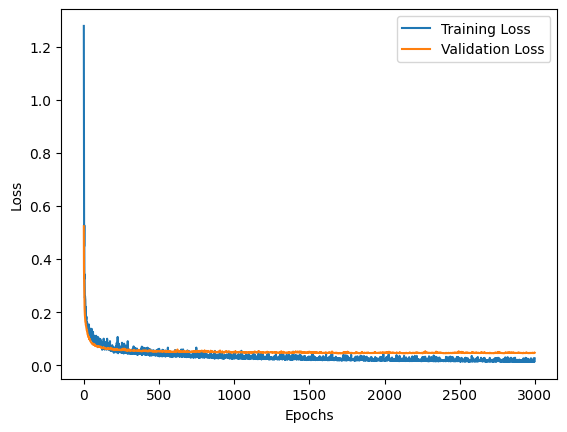

In [127]:
import matplotlib.pyplot as plt


plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [143]:
#print total losses from the training

print(f"Total Training Loss: {train_losses[-1]:.4f}")
print(f"Total Validation Loss: {val_losses[-1]:.4f}")

Total Training Loss: 0.0256
Total Validation Loss: 0.0470


In [139]:
#evaluating with test dataset


test_result= mlp.forward(test_x,training=False)
actual_predictions = (test_result * y_std) + y_mean
actual_y = (test_y * y_std) + y_mean

In [140]:
loss_function = SquaredError()
test_loss = loss_function.loss(test_result, test_y)

test_loss_value = np.mean(test_loss)
print(f"Test Loss: {test_loss_value:.4f}")

Test Loss: 0.0808


In [141]:
loss_function = SquaredError()
test_loss = loss_function.loss(test_result, test_y)

test_loss_value = np.mean(test_loss) if test_loss.ndim > 0 else test_loss
print(f"Test Loss: {test_loss_value:.4f}")

Test Loss: 0.0808


In [142]:
#show predicted values and actual values side by side


for i in range(50):
    print(f"Predicted: {actual_predictions[i][0]:.2f}, Actual: {actual_y[i][0]:.2f}")


Predicted: 18.24, Actual: 20.00
Predicted: 18.42, Actual: 16.00
Predicted: 26.94, Actual: 27.00
Predicted: 13.48, Actual: 13.00
Predicted: 18.05, Actual: 21.00
Predicted: 17.55, Actual: 19.40
Predicted: 14.13, Actual: 15.00
Predicted: 13.44, Actual: 15.00
Predicted: 25.14, Actual: 22.30
Predicted: 25.16, Actual: 18.00
Predicted: 28.34, Actual: 27.40
Predicted: 34.75, Actual: 31.90
Predicted: 26.55, Actual: 19.00
Predicted: 19.55, Actual: 18.00
Predicted: 36.05, Actual: 36.00
Predicted: 21.10, Actual: 19.40
Predicted: 21.26, Actual: 17.00
Predicted: 27.91, Actual: 26.00
Predicted: 12.36, Actual: 13.00
Predicted: 17.19, Actual: 18.20
Predicted: 27.12, Actual: 21.10
Predicted: 13.49, Actual: 13.00
Predicted: 19.10, Actual: 16.50
Predicted: 33.95, Actual: 36.00
Predicted: 14.99, Actual: 14.00
Predicted: 14.97, Actual: 16.90
Predicted: 28.91, Actual: 28.00
Predicted: 19.60, Actual: 22.00
Predicted: 24.03, Actual: 20.00
Predicted: 29.17, Actual: 26.00
Predicted: 26.67, Actual: 25.10
Predicte